In [2]:
%cd ..

/hdd/aouadt/these/projets/3d_segm


In [3]:
from importlib import reload

import matplotlib.pyplot as plt
import numpy as np

import deep_morpho.datasets.select_indexes_dataset as sid
import deep_morpho.datasets.gray_to_channels_dataset as gcd
import deep_morpho.datasets.cifar_dataset as cd
import deep_morpho.datasets.mnist_dataset as md

def reload_modules():
    for modl in [sid, gcd, cd, md]:
        reload(modl)

reload_modules()

In [4]:
reload_modules()
dataset = cd.CIFAR100Dataset(levelset_handler_args={"n_values": 10}, indexes=np.arange(10, 3000))
img, tar = dataset[0]

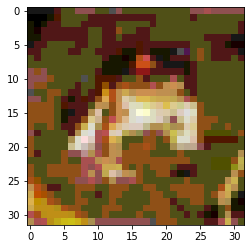

In [23]:
reload_modules()
dataloader = cd.CIFAR10Dataset.get_loader(batch_size=32, train=True,)
imgs, targets = next(iter(dataloader))

plt.imshow(dataloader.dataset.from_channels_to_gray_numpy(imgs[0]))

/hdd/aouadt/these/projets/3d_segm/deep_morpho/datasets/mnist_dataset.py:236: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  img=torch.tensor(choice(self.data).unsqueeze(0)),
/hdd/aouadt/these/projets/3d_segm/deep_morpho/datasets/gray_to_channels_dataset.py:136: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  input_ = torch.tensor(input_).float()


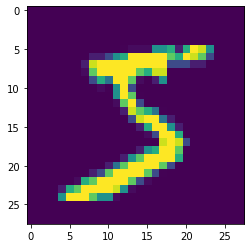

In [24]:
reload_modules()
dataloader = md.MnistClassifChannelDataset.get_loader(batch_size=32, train=True,)
imgs, targets = next(iter(dataloader))

plt.imshow(dataloader.dataset.from_channels_to_gray_numpy(imgs[0]))

In [9]:
targets

tensor([1, 9, 2, 1, 3, 1, 4, 3, 5, 3, 6, 1, 7, 2, 8, 6, 9, 4, 0, 9, 1, 1, 2, 4,
        3, 2, 7, 3, 8, 6, 9, 0])

In [78]:
img.original.unique(return_counts=True)

(tensor([  0.,   8.,  12.,  15.,  20.,  23.,  24.,  31.,  32.,  39.,  48.,  60.,
          62.,  63.,  64.,  66.,  68.,  80.,  89.,  94.,  96., 104., 124., 126.,
         127., 140., 151., 155., 159., 172., 184., 189., 193., 196., 205., 211.,
         220., 221., 228., 234., 235., 236., 240., 244., 247., 251., 253., 255.]),
 tensor([688,   2,   1,   1,   1,   1,   1,   2,   2,   1,   2,   1,   2,   1,
           2,   1,   1,   1,   1,   1,   1,   1,   1,   1,   1,   1,   1,   1,
           2,   1,   1,   1,   2,   1,   1,   1,   3,   1,   2,   1,   1,   1,
           1,   1,   1,  21,  18,   2]))

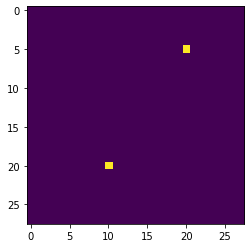

In [55]:
plt.imshow(img.original > 253)

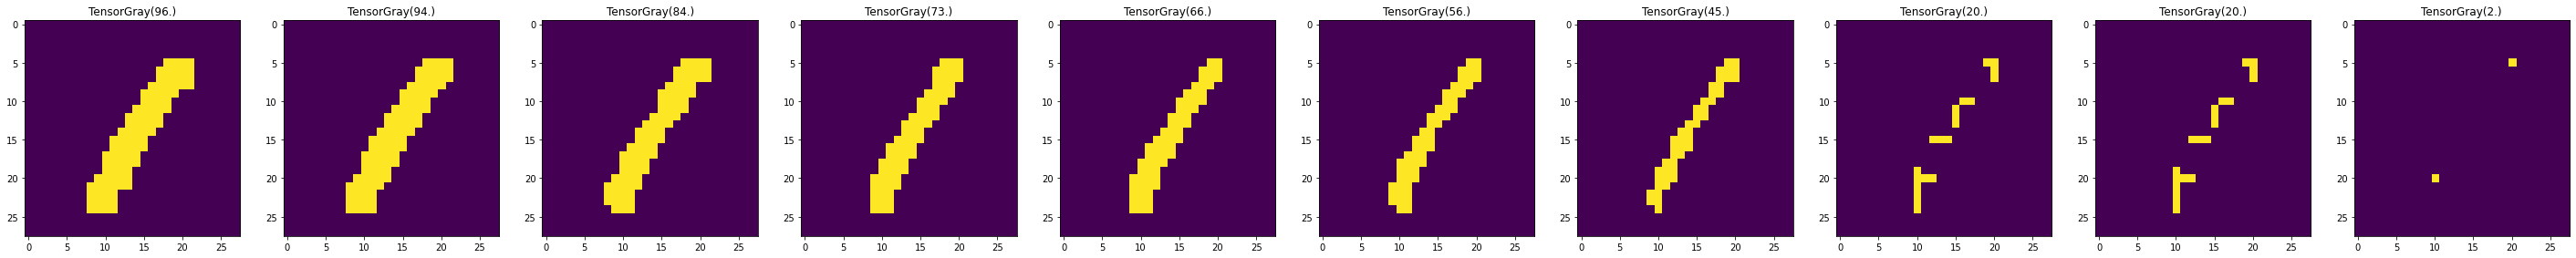

In [5]:
img = imgs[0]
fig, ax = plt.subplots(1, img.shape[0], figsize=(50, 5))
for chan in range(img.shape[0]):
    ax[chan].imshow(img[chan])
    ax[chan].set_title(img[chan].sum())


In [114]:
plt.imshow(img.original.int())
plt.title(dataset.classes[tar])

AttributeError: 'TensorGray' object has no attribute 'original'

In [94]:
img.original.shape

torch.Size([32, 32, 3])

In [85]:
reload_modules()

n_trials = 5
all_n_values = range(10, 30, 2)

errors = np.zeros((n_trials, len(all_n_values)))
for n in range(n_trials):
    for j, n_values in enumerate(all_n_values):
        dataset = cd.CIFAR10Dataset(levelset_handler_args={"n_values": n_values})
        img, tar = dataset[0]
        errors[n, j] = ((dataset.from_channels_to_gray(img) - img.original) / (img.original + 1e-5)).abs().mean()



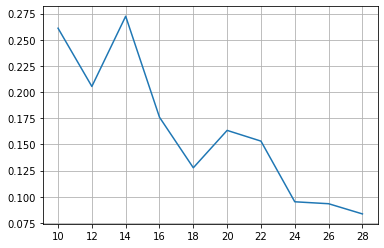

In [87]:
plt.grid('on')
plt.plot(all_n_values, errors.mean(0))
plt.xticks(all_n_values);


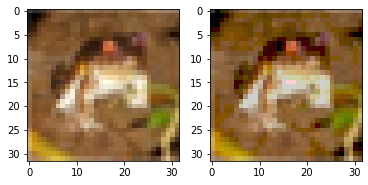

In [67]:
plt.subplot(121)
plt.imshow(img.original.numpy().transpose(1, 2, 0))

plt.subplot(122)
plt.imshow(dataset.from_channels_to_gray(img).numpy().transpose(1, 2, 0))

In [9]:
plt.imshow(img)
plt.title(dataset.classes[tar])

NameError: name 'img' is not defined